In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor

C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train=pd.read_csv('train_cab.csv',sep=',',dtype={'fare_amount':np.float},na_values={'fare_amount':'430-'})
test=pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16042 non-null  float64
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(6), object(1)
memory usage: 878.8+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [5]:
# Converting the pickup_datetime from object to datetime 
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'],errors='coerce')
test['pickup_datetime']=pd.to_datetime(test['pickup_datetime'],errors='coerce')

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 1   pickup_longitude   9914 non-null   float64            
 2   pickup_latitude    9914 non-null   float64            
 3   dropoff_longitude  9914 non-null   float64            
 4   dropoff_latitude   9914 non-null   float64            
 5   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 464.8 KB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        16042 non-null  float64            
 1   pickup_datetime    16066 non-null  datetime64[ns, UTC]
 2   pickup_longitude   16067 non-null  float64            
 3   pickup_latitude    16067 non-null  float64            
 4   dropoff_longitude  16067 non-null  float64            
 5   dropoff_latitude   16067 non-null  float64            
 6   passenger_count    16012 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 878.8 KB


In [8]:
train.shape,test.shape

((16067, 7), (9914, 6))

In [9]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [10]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [11]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [12]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Data Cleaning

In [13]:
train['fare_amount'].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 16067, dtype: float64

In [14]:
# fare amount above 453 will be considered as outliers
sum(train['fare_amount']>453)

2

In [15]:
# fare amount cannot be 0 or less than 0 is not possible
sum(train['fare_amount']<=0)

4

In [16]:
# observations which are not needed in our dataset
train[train['fare_amount']<1],train[train['passenger_count']<1],train[train['passenger_count']>6],train[train['fare_amount']>453]

(       fare_amount           pickup_datetime  pickup_longitude  \
 2039         -2.90 2010-03-09 23:37:10+00:00        -73.789450   
 2486         -2.50 2015-03-22 05:14:27+00:00        -74.000031   
 2780          0.01 2015-05-01 15:38:41+00:00        -73.939041   
 10002         0.00 2010-02-15 14:26:01+00:00        -73.987115   
 13032        -3.00 2013-08-30 08:57:10+00:00        -73.995062   
 
        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
 2039         40.643498         -73.788665         40.641952              1.0  
 2486         40.720631         -73.999809         40.720539              1.0  
 2780         40.713963         -73.941673         40.713997              1.0  
 10002        40.738808         -74.005911         40.713960              1.0  
 13032        40.740755         -73.995885         40.741357              4.0  ,
        fare_amount           pickup_datetime  pickup_longitude  \
 314           34.0 2015-06-02 23:16:15+00:00   

In [17]:
# latitude range is(-90,90) and Longitude range is (-180,180). Removing which doesn't satisfy these range respectively
print('Pickup Latitude above 90={}'.format(sum(train['pickup_latitude']>90)))
print('Pickup Latitude below -90={}'.format(sum(train['pickup_latitude']<-90)))
print('Pickup Longitude above 180={}'.format(sum(train['pickup_longitude']>180)))
print('Pickup Longitude below -180={}'.format(sum(train['pickup_longitude']<-180)))
print('Dropoff Longitude above 180={}'.format(sum(train['dropoff_longitude']>180)))
print('Dropoff Longitude below -180={}'.format(sum(train['dropoff_longitude']<-180)))
print('Dropoff Latitude above 90={}'.format(sum(train['dropoff_latitude']>90)))
print('Dropoff Latitude below -90={}'.format(sum(train['dropoff_latitude']<-90)))

Pickup Latitude above 90=1
Pickup Latitude below -90=0
Pickup Longitude above 180=0
Pickup Longitude below -180=0
Dropoff Longitude above 180=0
Dropoff Longitude below -180=0
Dropoff Latitude above 90=0
Dropoff Latitude below -90=0


In [18]:
# Latitude and Longitude cannot have 0 value 
for i in ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']:
    print(i,' equals to 0={}'.format(sum(train[i]==0)))

pickup_latitude  equals to 0=315
pickup_longitude  equals to 0=315
dropoff_latitude  equals to 0=312
dropoff_longitude  equals to 0=314


In [19]:
# Data Cleaning on basis of above observations
train=train.drop(train[train['fare_amount']<1].index,axis=0)
train=train.drop(train[train['fare_amount']>453].index,axis=0)
train=train.drop(train[train['passenger_count']<1].index,axis=0)
train=train.drop(train[train['passenger_count']>6].index,axis=0)
train=train.drop(train[train['pickup_latitude']>90].index,axis=0)
for i in ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']:
    train=train.drop(train[train[i]==0].index,axis=0)

In [20]:
#checking data after cleaning
sum(train['fare_amount']<1),sum(train['passenger_count']<1),sum(train['passenger_count']>6),sum(train['fare_amount']>453)

(0, 0, 0, 0)

In [21]:
# checking for latitude and longitude also
for i in ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']:
    print(i,' equals to 0={}'.format(sum(train[i]==0)))

pickup_latitude  equals to 0=0
pickup_longitude  equals to 0=0
dropoff_latitude  equals to 0=0
dropoff_longitude  equals to 0=0


# Feature Engineering

In [22]:
train.shape

(15659, 7)

In [23]:
print(train.isnull().sum()),
print('\n\n'),
print(test.isnull().sum())

fare_amount          22
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64



pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [24]:
missing_values=pd.DataFrame(train.isnull().sum())
missing_values=missing_values.reset_index()
missing_values

,index,0
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [25]:
missing_values=missing_values.rename(columns={'index':'features',0:'missing_percent'})
missing_values['missing_percent']=(missing_values['missing_percent']/len(train))
missing_values

,features,missing_percent
0,fare_amount,0.001405
1,pickup_datetime,0.000064
2,pickup_longitude,0.000000
3,pickup_latitude,0.000000
4,dropoff_longitude,0.000000
5,dropoff_latitude,0.000000
6,passenger_count,0.003512


In [26]:
missing_values=missing_values.sort_values('missing_percent',ascending=False).reset_index(drop=True)
missing_values

,features,missing_percent
0,passenger_count,0.003512
1,fare_amount,0.001405
2,pickup_datetime,0.000064
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [27]:
#dropping the missing_values as they are very less
train=train.drop(train[train['fare_amount'].isnull()].index,axis=0)
train=train.drop(train[train['passenger_count'].isnull()].index,axis=0)
train=train.drop(train[train['pickup_datetime'].isnull()].index,axis=0)
train.shape

(15581, 7)

In [28]:
train.isnull().sum()
# So now our dataset is clean and dosen't contain any missing values

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [29]:
train['passenger_count'].unique()

array([1. , 2. , 3. , 6. , 5. , 4. , 1.3])

In [30]:
sum(train['passenger_count']==1.3)
#as passenger count = 1.3 is not possible so we will dropping it
train=train.drop(train[train['passenger_count']==1.3].index,axis=0)
sum(train['passenger_count']==1.3)

0

In [31]:
# checking
train['passenger_count'].unique()

array([1., 2., 3., 6., 5., 4.])

In [32]:
# splitting the datetime in year,month,day,hour,minute,second
train['pickup_year']=train['pickup_datetime'].dt.year
train['pickup_month']=train['pickup_datetime'].dt.month
train['pickup_day']=train['pickup_datetime'].dt.day
train['pickup_hour']=train['pickup_datetime'].dt.hour
train['pickup_minute']=train['pickup_datetime'].dt.minute
train['pickup_second']=train['pickup_datetime'].dt.second

# In test dataset
test['pickup_year']=test['pickup_datetime'].dt.year
test['pickup_month']=test['pickup_datetime'].dt.month
test['pickup_day']=test['pickup_datetime'].dt.day
test['pickup_hour']=test['pickup_datetime'].dt.hour
test['pickup_minute']=test['pickup_datetime'].dt.minute
test['pickup_second']=test['pickup_datetime'].dt.second

In [33]:
train['pickup_dayofweek']=train['pickup_datetime'].dt.dayofweek
test['pickup_dayofweek']=test['pickup_datetime'].dt.dayofweek

In [34]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15580 entries, 0 to 16065
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        15580 non-null  float64            
 1   pickup_datetime    15580 non-null  datetime64[ns, UTC]
 2   pickup_longitude   15580 non-null  float64            
 3   pickup_latitude    15580 non-null  float64            
 4   dropoff_longitude  15580 non-null  float64            
 5   dropoff_latitude   15580 non-null  float64            
 6   passenger_count    15580 non-null  float64            
 7   pickup_year        15580 non-null  int64              
 8   pickup_month       15580 non-null  int64              
 9   pickup_day         15580 non-null  int64              
 10  pickup_hour        15580 non-null  int64              
 11  pickup_minute      15580 non-null  int64              
 12  pickup_second      15580 non-null  int64      

(None, None)

In [35]:
train['pickup_year'].unique(),test['pickup_year'].unique()

(array([2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64),
 array([2015, 2011, 2012, 2014, 2010, 2013, 2009], dtype=int64))

In [36]:
train['pickup_month'].unique(),test['pickup_month'].unique()

(array([ 6,  1,  8,  4,  3, 11,  9,  7,  2, 12,  5, 10], dtype=int64),
 array([ 1, 10, 12,  2,  3,  7,  6,  8, 11,  9,  4,  5], dtype=int64))

In [37]:
train['pickup_day'].unique(),test['pickup_day'].unique()

(array([15,  5, 18, 21,  9,  6, 20,  4,  2,  8, 19, 22,  7, 12, 10, 28, 11,
        24, 29, 31,  1, 14, 23, 16, 17, 27,  3, 25, 30, 26, 13],
       dtype=int64),
 array([27,  8,  1,  6, 18, 29, 15, 14, 12, 20, 22,  4, 24, 28, 21,  9, 25,
         7, 31, 10, 23, 30,  2,  5,  3, 16, 11, 26, 19, 17, 13],
       dtype=int64))

In [38]:
train['pickup_dayofweek'].unique(),train['pickup_dayofweek'].value_counts(),
test['pickup_dayofweek'].unique(),test['pickup_dayofweek'].value_counts()

(array([1, 5, 3, 0, 6, 2, 4], dtype=int64), 1    1692
 2    1612
 5    1475
 0    1454
 4    1283
 6    1222
 3    1176
 Name: pickup_dayofweek, dtype: int64)

In [39]:
train['pickup_hour'].unique(),train['pickup_hour'].value_counts()

(array([17, 16,  0,  4,  7,  9, 20,  1, 19, 14, 13, 12, 18, 15,  6, 23,  3,
         8, 10, 11, 21,  2, 22,  5], dtype=int64), 18    968
 19    961
 20    932
 21    892
 22    880
 12    777
 14    774
 13    762
 9     761
 23    752
 17    751
 15    721
 11    721
 8     681
 10    654
 16    644
 7     625
 0     583
 1     452
 6     326
 2     322
 3     282
 4     202
 5     157
 Name: pickup_hour, dtype: int64)

In [40]:
test['pickup_hour'].unique(),test['pickup_hour'].value_counts()

(array([13, 11, 21, 12, 15, 20,  3, 16,  2,  9,  0,  8, 19, 18, 14, 23, 10,
        22,  4,  7,  6,  5, 17,  1], dtype=int64), 7     830
 22    804
 21    797
 16    756
 18    752
 2     565
 12    523
 23    503
 9     464
 13    458
 17    425
 14    401
 0     379
 19    334
 20    325
 11    276
 8     267
 15    265
 1     232
 10    190
 3     145
 6      94
 5      65
 4      64
 Name: pickup_hour, dtype: int64)

In [41]:
train['pickup_minute'].unique(),train['pickup_minute'].value_counts()

(array([26, 52, 35, 30, 51, 50, 22, 11,  4, 54,  8, 36, 18, 15, 17, 29, 37,
        47,  3, 10,  5, 42, 39, 55, 38, 28, 12, 14, 53, 16,  9, 31,  1,  7,
         6, 13, 57, 21, 59, 19, 34, 20,  0, 33, 24, 44, 40,  2, 49, 48, 41,
        56, 23, 43, 27, 45, 46, 32, 58, 25], dtype=int64), 5     291
 20    287
 10    285
 43    282
 41    281
 54    278
 49    278
 39    278
 51    277
 11    276
 37    272
 13    272
 26    272
 53    272
 32    271
 27    270
 45    269
 47    269
 33    268
 23    267
 24    267
 31    267
 1     267
 28    266
 59    265
 56    265
 29    264
 22    263
 42    262
 50    261
 2     261
 46    260
 48    260
 7     259
 44    257
 6     257
 14    257
 57    257
 52    256
 38    256
 12    255
 35    254
 17    254
 21    254
 58    252
 15    251
 0     249
 16    248
 30    247
 25    245
 34    245
 18    244
 19    243
 4     242
 9     240
 55    236
 3     231
 8     221
 40    216
 36    211
 Name: pickup_minute, dtype: int64)

In [42]:
test['pickup_minute'].unique(),test['pickup_minute'].value_counts()

(array([ 8, 53, 12, 10, 22, 20, 59, 45,  9, 39, 42, 34, 14, 58, 38, 36, 52,
        29,  3, 37, 16, 54, 31, 57, 55, 47,  2, 33, 32, 50, 13, 19, 11,  6,
         1, 27, 23, 48, 17,  7, 21, 15, 44,  4, 46, 35, 43, 18, 25, 26, 49,
        30,  0, 51, 40,  5, 56, 41, 28, 24], dtype=int64), 0     652
 37    565
 19    373
 54    365
 3     307
 45    300
 33    300
 48    293
 39    287
 1     285
 43    280
 29    275
 57    270
 11    264
 55    263
 47    251
 13    247
 58    240
 36    235
 16    188
 44    175
 6     171
 31    142
 9     136
 52    129
 50    116
 23    110
 5     110
 4     109
 49    106
 28    104
 7     103
 56    101
 32     99
 20     98
 15     97
 38     90
 2      87
 21     86
 18     86
 8      82
 59     81
 42     79
 51     78
 12     78
 14     77
 34     77
 27     76
 24     73
 41     73
 25     72
 53     71
 17     69
 46     68
 10     67
 40     64
 26     63
 30     61
 22     58
 35     52
 Name: pickup_minute, dtype: int64)

In [43]:
#calculating the distance using latitude and longitude.
# So we will calculate the distance using haversine formula
from math import sin,cos,sqrt,atan2,radians,asin

def distance(lon1,lat1,lon2,lat2):
    #converting latitude and longitude into radians
    lon1,lat1,lon2,lat2=map(np.radians,[lon1,lat1,lon2,lat2])
    
    dlon=lon2-lon1
    dlat=lat2-lat1
    
    a=np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    
    c=2*np.arcsin(np.sqrt(a))
    
    km=6367*c
    
    return km


train['journey_distance']=distance(train['pickup_longitude'],train['pickup_latitude'],train['dropoff_longitude'],train['dropoff_latitude'])
test['journey_distance']=distance(test['pickup_longitude'],test['pickup_latitude'],test['dropoff_longitude'],test['dropoff_latitude'])

In [44]:
train['journey_distance'].sort_values(ascending=False),test['journey_distance'].sort_values(ascending=False)

(5864     5417.585418
 7014     4444.294617
 10710     129.868894
 14536     129.479111
 11619     127.429205
             ...     
 5023        0.000000
 1222        0.000000
 3945        0.000000
 1214        0.000000
 1335        0.000000
 Name: journey_distance, Length: 15580, dtype: float64, 4080    99.933258
 8529    98.130769
 5887    97.179923
 7269    33.583267
 4334    28.819072
           ...    
 8835     0.000000
 943      0.000000
 2258     0.000000
 7637     0.000000
 6335     0.000000
 Name: journey_distance, Length: 9914, dtype: float64)

In [45]:
sum(train['journey_distance']==0),sum(train['journey_distance']>130)

(155, 2)

In [46]:
sum(test['journey_distance']==0),sum(test['journey_distance']>130)

(85, 0)

In [47]:
# Droppping the values of distance which are 0 and greater than 130
train=train.drop(train[train['journey_distance']==0].index,axis=0)
train=train.drop(train[train['journey_distance']>130].index,axis=0)

In [48]:
# Checking 
sum(train['journey_distance']==0),sum(train['journey_distance']>130)

(0, 0)

In [49]:
# Drooping the vakues od distance which are = 0 from test set
test=test.drop(test[test['journey_distance']==0].index,axis=0)

#checking
sum(test['journey_distance']==0),sum(test['journey_distance']>130)

(0, 0)

In [50]:
#now deleting the features which are not required further
train=train.drop(train[['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_latitude','dropoff_longitude','pickup_minute','pickup_second']],axis=1)

In [51]:
test=test.drop(test[['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_latitude','dropoff_longitude','pickup_minute','pickup_second']],axis=1)

In [52]:
train.head()

,fare_amount,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,journey_distance
0,4.5,1.0,2009,6,15,17,0,1.030117
1,16.9,1.0,2010,1,5,16,1,8.444828
2,5.7,2.0,2011,8,18,0,3,1.388653
3,7.7,1.0,2012,4,21,4,5,2.797513
4,5.3,1.0,2010,3,9,7,1,1.997902


In [53]:
test.head()

,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,journey_distance
0,1,2015,1,27,13,1,2.321801
1,1,2015,1,27,13,1,2.423830
2,1,2011,10,8,11,5,0.618239
3,1,2012,12,1,21,5,1.959801
4,1,2012,12,1,21,5,5.383919


In [54]:
train.dtypes,test.dtypes

(fare_amount         float64
 passenger_count     float64
 pickup_year           int64
 pickup_month          int64
 pickup_day            int64
 pickup_hour           int64
 pickup_dayofweek      int64
 journey_distance    float64
 dtype: object, passenger_count       int64
 pickup_year           int64
 pickup_month          int64
 pickup_day            int64
 pickup_hour           int64
 pickup_dayofweek      int64
 journey_distance    float64
 dtype: object)

In [55]:
# converting data in data type required
train['passenger_count']=train['passenger_count'].astype('int64')

In [56]:
train.dtypes

fare_amount         float64
passenger_count       int64
pickup_year           int64
pickup_month          int64
pickup_day            int64
pickup_hour           int64
pickup_dayofweek      int64
journey_distance    float64
dtype: object

# Data Visualization

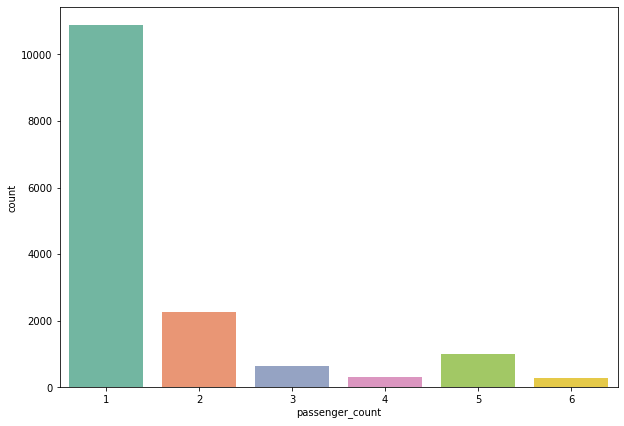

In [57]:
# visualizing passenger_count of train dataset
plt.figure(figsize=(10,7))
sns.countplot(x='passenger_count',data=train,palette='Set2')

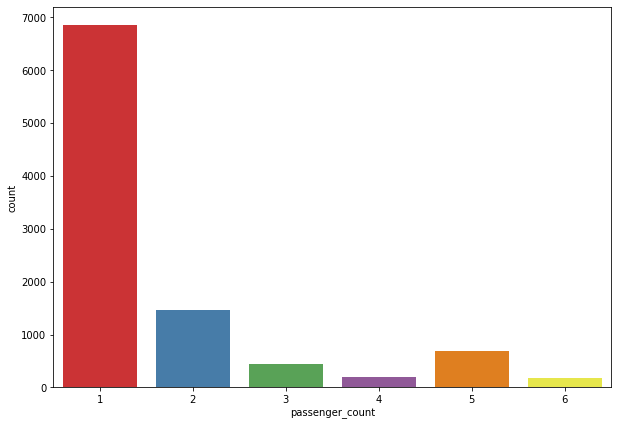

In [58]:
#visualizing passeneger_count of test dataset
plt.figure(figsize=(10,7))
sns.countplot(x='passenger_count',data=test,palette='Set1')

Text(0.5, 1.0, 'Relationship between passenger_count vs fare_amount')

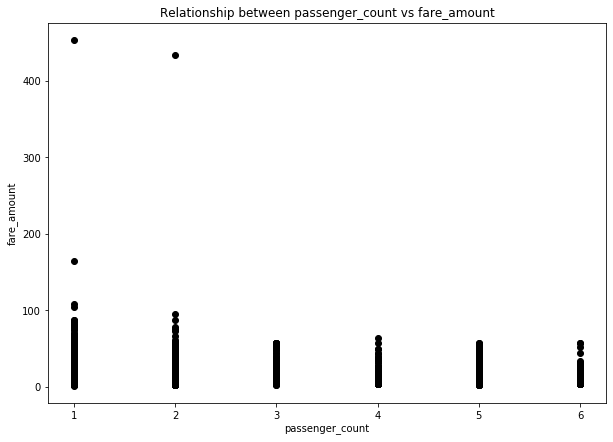

In [59]:
# visualizing fare_amount vs passenger_count
plt.figure(figsize=(10,7))
plt.scatter(x='passenger_count',y='fare_amount',data=train,color='black')
plt.xlabel('passenger_count')
plt.ylabel('fare_amount')
plt.title('Relationship between passenger_count vs fare_amount')


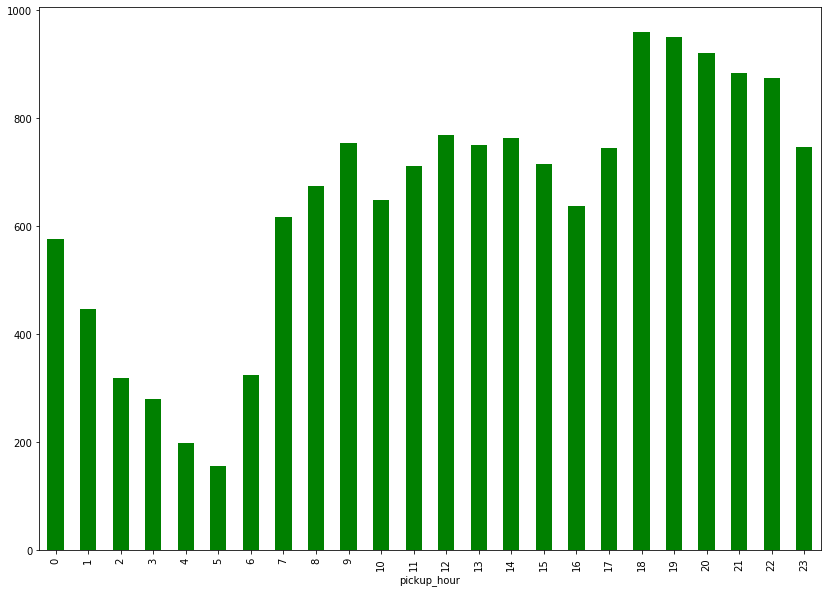

In [60]:
plt.figure(figsize=(14,10))
train.groupby(train['pickup_hour'])['pickup_hour'].count().plot(kind='bar',color='green')
plt.show()

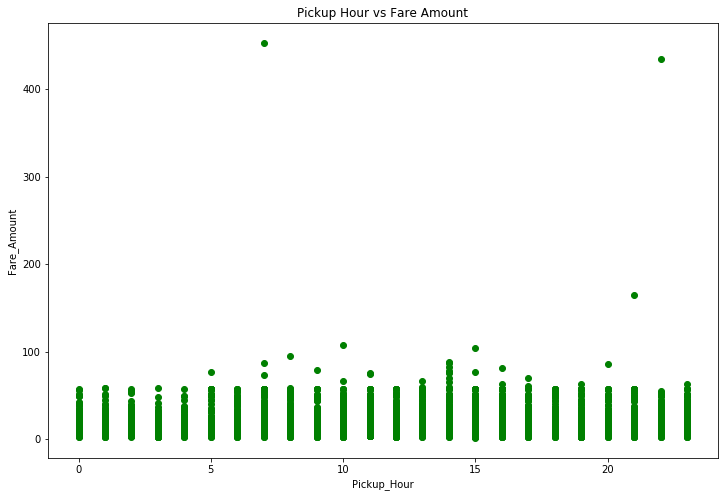

In [61]:
plt.figure(figsize=(12,8))
plt.scatter(x='pickup_hour',y='fare_amount',data=train,color='green')
plt.title('Pickup Hour vs Fare Amount')
plt.xlabel('Pickup_Hour')
plt.ylabel('Fare_Amount')
plt.show()

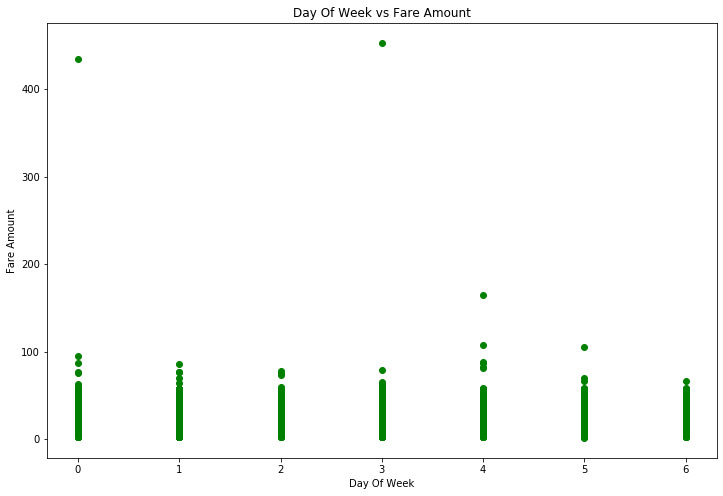

In [62]:
plt.figure(figsize=(12,8))
plt.scatter(x='pickup_dayofweek',y='fare_amount',data=train,color='green')
plt.xlabel('Day Of Week')
plt.ylabel('Fare Amount')
plt.title('Day Of Week vs Fare Amount')
plt.show()

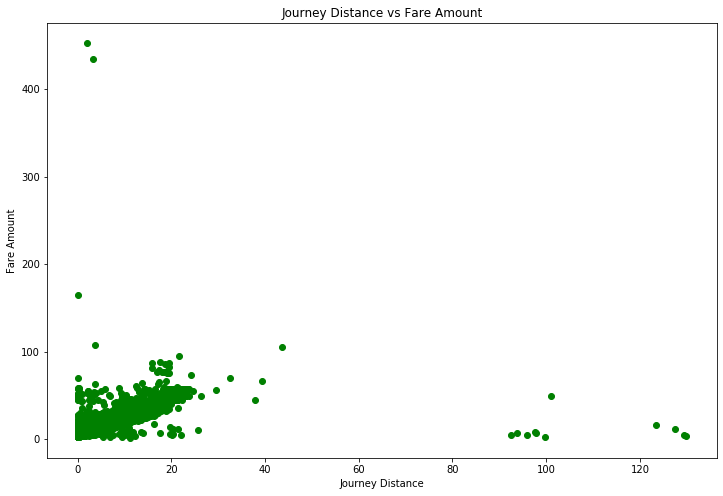

In [63]:
# Distance vs Fare amount
plt.figure(figsize=(12,8))
plt.scatter(x='journey_distance',y='fare_amount',data=train,color='green')
plt.xlabel('Journey Distance')
plt.ylabel('Fare Amount')
plt.title('Journey Distance vs Fare Amount')
plt.show()

journey_distance


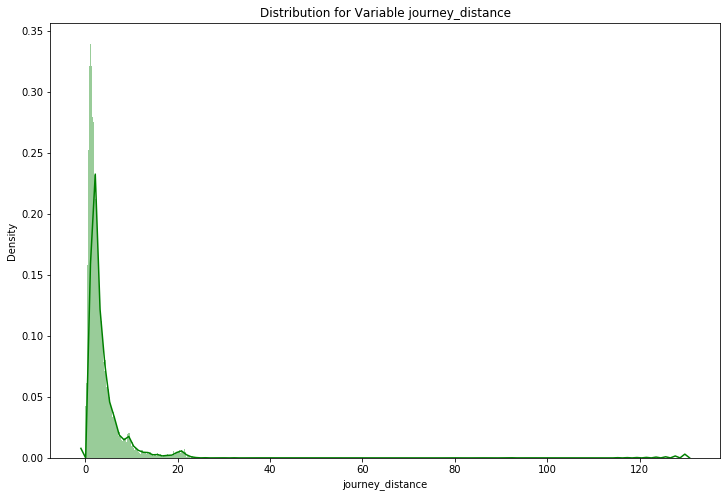

fare_amount


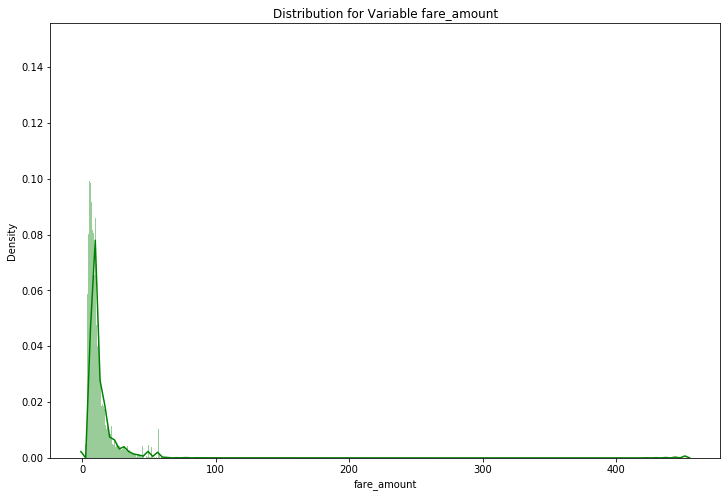

In [64]:
# Analyzing the distribution of Journey Distance and Fare_amount
for i in ['journey_distance','fare_amount']:
    print(i)
    plt.figure(figsize=(12,8))
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()


In [65]:
# AS we can see from the distribution plot that the skewness is very high so we need to reduce it 
train['fare_amount']=np.log1p(train['fare_amount'])

train['journey_distance']=np.log1p(train['journey_distance'])

journey_distance


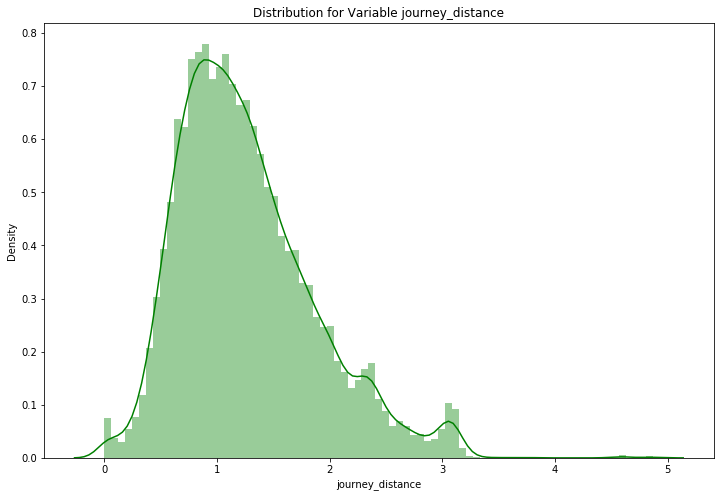

fare_amount


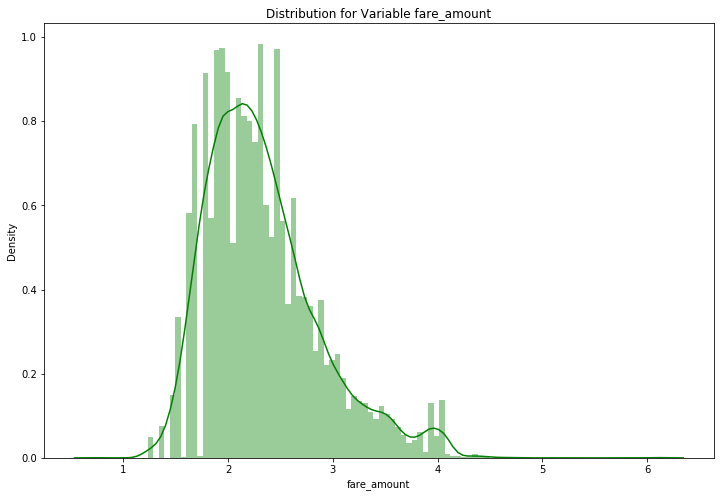

In [66]:
# Again checking the distribution plot after reducing skewnesss
for i in ['journey_distance','fare_amount']:
    print(i)
    plt.figure(figsize=(12,8))
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [67]:
train.head()

,fare_amount,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,journey_distance
0,1.704748,1,2009,6,15,17,0,0.708093
1,2.884801,1,2010,1,5,16,1,2.245467
2,1.902108,2,2011,8,18,0,3,0.870730
3,2.163323,1,2012,4,21,4,5,1.334346
4,1.840550,1,2010,3,9,7,1,1.097913


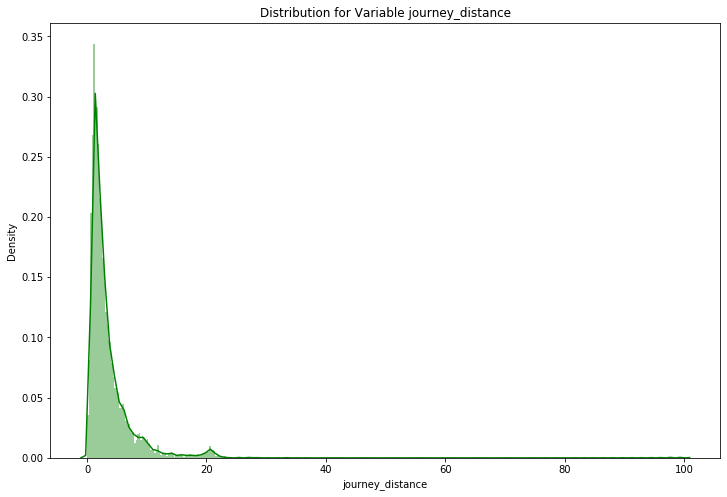

In [68]:
# Analyzing distance distribution plot for test dataset
plt.figure(figsize=(12,8))
sns.distplot(test['journey_distance'],bins='auto',color='green')
plt.title("Distribution for Variable journey_distance")
plt.ylabel("Density")
plt.show()

In [69]:
# Since journey distance in test dataset is having skewness we need to reduce it 
test['journey_distance']=np.log1p(test['journey_distance'])

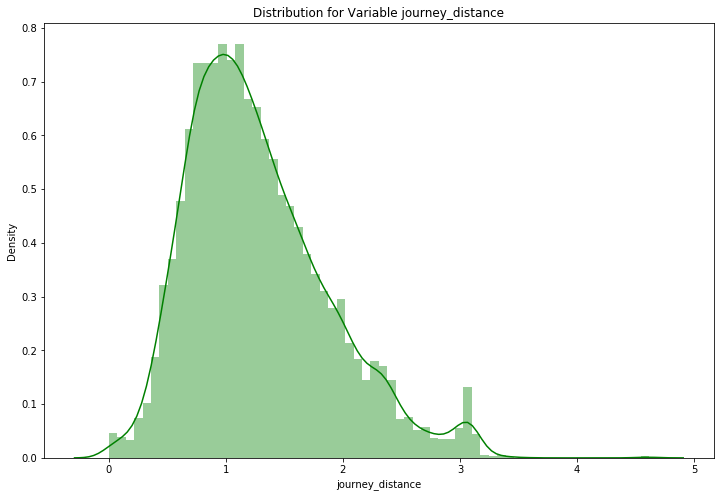

In [70]:
# Checking the distribution plot again.
plt.figure(figsize=(12,8))
sns.distplot(test['journey_distance'],bins='auto',color='green')
plt.title("Distribution for Variable journey_distance")
plt.ylabel("Density")
plt.show()

In [71]:
test.head()

,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,journey_distance
0,1,2015,1,27,13,1,1.200507
1,1,2015,1,27,13,1,1.230760
2,1,2011,10,8,11,5,0.481339
3,1,2012,12,1,21,5,1.085122
4,1,2012,12,1,21,5,1.853782


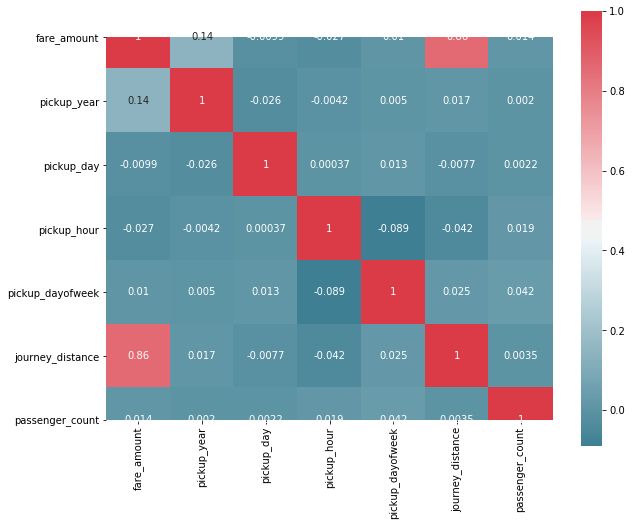

In [72]:
# Feature Selection 
num_values=['fare_amount','pickup_year','pickup_day','pickup_hour','pickup_dayofweek','journey_distance','passenger_count']
train_corr=train.loc[:,num_values]
f, ax=plt.subplots(figsize=(10,8))
correlation_matrix=train_corr.corr()

sns.heatmap(correlation_matrix,annot=True,mask=np.zeros_like(correlation_matrix,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax).get_figure().savefig('pythonheat_map.png')

In [73]:
y=train['fare_amount']
X=train.drop(['pickup_day'],axis=1)

In [74]:
# splitting the train data set for model building and finding accuracy.
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.1)

In [75]:
features=['passenger_count', 'pickup_year', 'pickup_month', 'pickup_dayofweek', 'pickup_hour', 'journey_distance']

In [76]:
Xtrain=Xtrain[features]
Xtest=Xtest[features]

In [77]:
test=test.drop(['pickup_day'],axis=1)

In [78]:
testB=test

In [79]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((13880, 6), (1543, 6), (13880,), (1543,))

# Linear Regression Model

In [80]:
LRmodel=sm.OLS(ytrain,Xtrain).fit()

In [81]:
LRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.721e+05
Date:                Sun, 21 Jun 2020   Prob (F-statistic):                        0.00
Time:                        17:53:07   Log-Likelihood:                         -1840.5
No. Observations:               13880   AIC:                                      3693.
Df Residuals:                   13874   BIC:                                      3738.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
passenger_count      0.0052      0.002      2.817      0.005       0.002       0.009
pickup_year          0.0007    4.9e-06    134.240      0.000       0.001       0.001
pickup_month         0.0037      0.001      5.458      0.000       0.002       0.005
pickup_dayofweek    -0.0027      0.001     -2.243      0.025      -0.005      -0.000
pickup_hour          0.0007      0.000      2.008      0.045    1.72e-05       0.001
journey_distance     0.7745      0.004    200.074      0.000       0.767       0.782
==============================================================================
Omnibus:                     6637.409   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542615.553
Skew:                           1.412   Prob(JB):                         0.00
Kurtosis:                      33.500   Cond. No.                     3.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
predictions=LRmodel.predict(Xtest)

In [83]:
predictions.head()

13577    1.952038
8675     1.715222
13843    2.024594
4230     1.812411
8437     2.392589
dtype: float64

In [84]:
new_predict=LRmodel.predict(testB)

In [85]:
new_predict.head()

0    2.228838
1    2.252270
2    1.710903
3    2.159781
4    2.755129
dtype: float64

# Lasso Regression Model

In [86]:
# Lasso Regression 
lasso_model=Lasso(alpha=0.005,random_state=0)
lasso_model.fit(Xtrain,ytrain)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
lasso_predict=lasso_model.predict(Xtest)

In [88]:
lasso_predict

array([1.88572837, 1.70758124, 1.96700345, ..., 2.95709117, 3.00072129,
       1.74601282])

In [89]:
lasso_predictB=lasso_model.predict(testB)

In [90]:
lasso_predictB

array([2.35742634, 2.38036837, 1.71802739, ..., 3.7464222 , 3.16790616,
       2.0495673 ])

# Decision Tree Model

In [91]:
#Decision Tree Regressor
decision_model=DecisionTreeRegressor(max_depth=10).fit(Xtrain,ytrain)

In [92]:
prediction_decision=decision_model.predict(Xtest)

In [93]:
prediction_decision

array([1.84872605, 1.64557053, 1.91997081, ..., 2.94143255, 2.94112245,
       1.7524529 ])

In [94]:
predictionB_decision=decision_model.predict(testB)

In [95]:
predictionB_decision

array([2.18796332, 2.18796332, 1.64557053, ..., 3.95492057, 3.52946391,
       1.95863384])

# Random Forest Model

In [96]:
# RANDOM FOREST REGRESSOR
random_model=RandomForestRegressor(n_estimators=20).fit(Xtrain,ytrain)

In [97]:
random_prediction=random_model.predict(Xtest)

In [98]:
random_prediction

array([1.87244734, 1.71738228, 1.92899959, ..., 2.95510819, 2.75266662,
       1.698483  ])

In [99]:
random_predictionB=random_model.predict(testB)

In [100]:
random_predictionB

array([2.24560407, 2.24286667, 1.56929814, ..., 3.68343027, 3.4297748 ,
       1.97277967])

# Model Evaluation 

In [101]:
def evaluation(actual_v,predict_v):
    MAE = np.mean(np.abs((actual_v - predict_v) / actual_v))*100
    return MAE

In [102]:
# Model Evaluation for Linear Regression
evaluation(ytest,predictions)

8.552970887784788

In [103]:
# Model Evaluation fro Lasso Regression 
evaluation(ytest,lasso_predict)

8.075852429515965

In [105]:
#Model Evaluation for Decision Tree Model
evaluation(ytest,prediction_decision)

8.185414798154401

In [106]:
# Model evaluation for Random Forest Model
evaluation(ytest,random_prediction)

7.923552765214102

In [109]:
test['fare_amount']=random_predictionB

In [110]:
test.head()

,passenger_count,pickup_year,pickup_month,pickup_hour,pickup_dayofweek,journey_distance,fare_amount
0,1,2015,1,13,1,1.200507,2.245604
1,1,2015,1,13,1,1.230760,2.242867
2,1,2011,10,11,5,0.481339,1.569298
3,1,2012,12,21,5,1.085122,2.104915
4,1,2012,12,21,5,1.853782,2.799301
